In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Rwork/refined_data_ya.csv", delimiter=',')
df = df.drop('Unnamed: 0', axis=1)
df.head()
#df.shape

,성별,연령_10세단위,직업구분,지역구분,총자산,월총저축액,월총소비금액,월평균카드사용금액,기타자산B,월저축액_저축성보험B,월저축액_청약B,노후자금융월저축액B
0,1,2,2,4,2.046488,3.688879,4.700480,1437017,1000_2500,No,No,No
1,1,3,2,2,2.188594,4.787492,4.644391,3211358,0_300,Yes,Yes,Yes
2,2,3,2,2,2.364906,4.787492,5.703782,2932871,1000_2500,Yes,Yes,No
3,1,5,2,4,2.461430,3.401197,5.991465,3106659,1000_2500,No,No,No
4,1,4,2,2,2.343660,4.605170,5.857933,3615840,1000_2500,No,No,No


In [127]:
target = pd.read_csv('C:/Rwork/Shinhan_data_ya.csv', delimiter=',')
target.head()
target.shape

(17076, 35)

In [130]:

target01 = target['금용상품잔액_적금']
juckgeum = pd.concat([df, target01], axis=1)
juckgeum.head()
#juckgeumRe = juckgeum.dropna()
#juckgeumRe.head()
#plt.matshow(juckgeum.corr())

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = juckgeum.corr()
corr.style.background_gradient()


,성별,연령_10세단위,직업구분,지역구분,총자산,월총저축액,월총소비금액,월평균카드사용금액,금용상품잔액_적금
성별,1,-0.119092,-0.0476704,-0.0438319,-0.0882404,0.0443623,-0.0928248,-0.236292,-0.0727852
연령_10세단위,-0.119092,1,0.148862,0.00114598,0.424143,0.124487,0.420723,0.334094,0.129098
직업구분,-0.0476704,0.148862,1,0.00877176,-0.076349,-0.160485,-0.0744657,-0.0571785,-0.0154922
지역구분,-0.0438319,0.00114598,0.00877176,1,-0.0837194,-0.0463067,-0.0403941,-0.128703,-0.0551225
총자산,-0.0882404,0.424143,-0.076349,-0.0837194,1,0.402887,0.485278,0.337956,0.26808
월총저축액,0.0443623,0.124487,-0.160485,-0.0463067,0.402887,1,0.311032,0.108107,0.281022
월총소비금액,-0.0928248,0.420723,-0.0744657,-0.0403941,0.485278,0.311032,1,0.314603,0.177632
월평균카드사용금액,-0.236292,0.334094,-0.0571785,-0.128703,0.337956,0.108107,0.314603,1,0.118236
금용상품잔액_적금,-0.0727852,0.129098,-0.0154922,-0.0551225,0.26808,0.281022,0.177632,0.118236,1


In [131]:
juckgeumRe = juckgeum.dropna()
juckgeumRe.head()

numeric_cols = ['총자산','월총저축액','월총소비금액']
#numeric_cols = ['월총소비금액']
x_cols =  juckgeumRe[numeric_cols]

categorical_cols = ['성별','연령_10세단위','직업구분','지역구분','기타자산B','월저축액_저축성보험B','월저축액_청약B','노후자금융월저축액B']
#categorical_cols = ['직업구분']
for i in categorical_cols:
    dummies = pd.get_dummies(juckgeumRe[i])
    x_cols = pd.concat([x_cols, dummies], axis=1)

x_target = x_cols.as_matrix()

#x_cat_cols = juckgeumRe[categorical_cols].as_matrix() 

#numeric_cols = ['총자산','월총저축액','월총소비금액']
#x_numeric_cols = juckgeumRe[numeric_cols]
#x_sum = pd.concat([x_cat_cols, x_numeric_cols], axis=1)

y_target = juckgeumRe['금용상품잔액_적금']


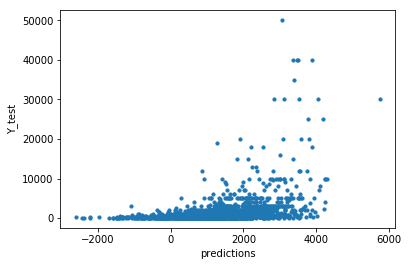

r-squared :  0.12176155120280219
accuracy_score :  0
[ 3.56331651e+03  5.96407545e+02  2.48455368e+01  5.16719910e+15
  5.16719910e+15  1.16751702e+16  1.16751702e+16  1.16751702e+16
  1.16751702e+16  1.16751702e+16 -5.90496303e+15 -5.90496303e+15
 -5.90496303e+15 -5.90496303e+15 -5.90496303e+15 -5.90496303e+15
 -5.90496303e+15 -3.12162608e+14 -3.12162608e+14 -3.12162608e+14
 -3.12162608e+14 -3.12162608e+14 -1.03452292e+16 -1.03452292e+16
 -1.03452292e+16 -1.03452292e+16 -1.03452292e+16  2.43807888e+15
  2.43807888e+15 -1.52434459e+15 -1.52434459e+15  2.19074503e+15
  2.19074503e+15]
-3384493727060551.5


In [132]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x_target, y_target, test_size=0.25, random_state=12)

lr = LinearRegression()
model_value = lr.fit(X_train,y_train)
predictions = model_value.predict(X_test)

plt.scatter(predictions, y_test, s=10)
plt.xlabel("predictions")
plt.ylabel("Y_test")
#plt.plot(predictions, y_test)
plt.show()

r2 = r2_score(y_test, predictions)
print("r-squared : ", r2)

accuracy = accuracy_score(y_test, predictions.round(), normalize=False)
print('accuracy_score : ', accuracy)

print(model_value.coef_)
print(model_value.intercept_)


Score 0.12176155120280219


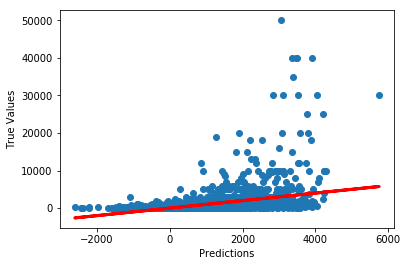

In [133]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(x_target, y_target, test_size=0.25, random_state=12)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

plt.scatter(predictions, y_test)
plt.ylabel("True Values")
plt.xlabel("Predictions")
print ("Score", model.score(X_test, y_test))

# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, y_train)
 
# Plot outputs
plt.plot(predictions, regr.predict(X_test), color='red',linewidth=3)

plt.show()